## Sentiment Analysis using Supervised Learning

The aim of this project is to  build a model to classify customer reviews on product into positive and negative sentiment.
The model may then be used on new data (reviews) to classify them into thier respective classes (negative / positive sentiment). This may help as perform further analysis on the classified reviews, eg. the frequency of positive and negative reviews, and comparison with similar data.


## Model building process.

At this stage I went through all the process involved in buiding and evaluating a supervised learning model.
These includes:
* data splitting
* feature extractions
* fitting the data with different models
* performing model evaluations
* comparing different models and choosing the best model.
* tuning the best model and saving it for deployment purposes.

### Findings:
After the Exploratory Data Analysis we probabily notice what kind of data we are dealing with,is all tech gadgets possible smartphones review and other related stuffs.

In [26]:
# import the required libraries
import re

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# NLP tools
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.collocations import FreqDist, BigramCollocationFinder
import text_normalizer as tn
import word_cloud as wc
import spacy
from spacy import displacy

stop_words = nltk.corpus.stopwords.words('english')


# preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# tuning and evaluation


ModuleNotFoundError: No module named 'contractions'

In [2]:
gnb =GaussianNB()
lr= LogisticRegression()
svc= SVC()
dt= DecisionTreeClassifier()
rf = RandomForestClassifier()

In [3]:
# Load data and perform Exploratory Analysis

In [4]:
# product review

PATH='data/sentiment labelled sentences/amazon_cells_labelled.txt'
amazon_cells= pd.read_csv(PATH,  delimiter='\t',header=None)

In [5]:
amazon_cells.columns = ['Review', 'Sentiment']

In [6]:
amazon_cells.head()

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [7]:
amazon_cells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     1000 non-null   object
 1   Sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
amazon_cells.isna().sum()

Review       0
Sentiment    0
dtype: int64

In [9]:
amazon_cells['Sentiment'].value_counts(normalize=True)

0    0.5
1    0.5
Name: Sentiment, dtype: float64

In [10]:
# we perform analysis on the text data

reviews_list= amazon_cells['Review'].to_list()

## Exploratory Data Analysis

Here, I performed exploratory analysis on  the data to see the kind of data I am working with.
And also to see how often a particular word or group of words are mentioned in the reviews data.
I also searched for **collocations** and **Named Entities**.

In [11]:
reviews_list

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.',
 'Great for the jawbone.',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
 'The mic is great.',
 'I have to jiggle the plug to get it to line up right to get decent volume.',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
 'If you are Razr owner...you must have this!',
 'Needless to say, I wasted my money.',
 'What a waste of money and time!.',
 'And the sound quality is great.',
 'He was very impressed when going from the original battery to the extended battery.',
 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.',
 'Very good quality though',
 'The design is very odd, as the ear "clip" is not very comfortable at all.',
 'Highly recommend for any one who has a blue tooth phone.',
 'I advise EVERYO

In [12]:
# Search for words in capital letters
# capatalized senetence contains mostly bad sentiment

for sent in reviews_list:
    match= re.findall(r'[A-Z]+', sent)
    if len(match) < 4:
        pass
    else:
        print(match)
    

['I', 'EVERYONE', 'DO', 'NOT', 'BE', 'FOOLED']
['S', 'F', 'S', 'G']
['P', 'T', 'T', 'P']
['AFTER', 'ARGUING', 'WITH', 'VERIZON', 'REGARDING', 'THE', 'DROPPED', 'CALLS', 'WE', 'RETURNED', 'THE', 'PHONES', 'AFTER', 'TWO', 'DAYS']
['D', 'N', 'B', 'D', 'D']
['B', 'B', 'V', 'C']
['I', 'ARE', 'NOT', 'INCLUDED']
['I', 'W', 'H', 'M']
['A', 'I', 'I', 'T', 'I', 'I']
['S', 'P', 'G', 'N']
['I', 'E', 'W', 'I', 'I']
['W', 'C', 'S', 'E']
['DO', 'NOT', 'PURCHASE', 'THIS', 'PHONE']
['B', 'M', 'R', 'V']
['A', 'PIECE', 'OF', 'JUNK', 'THAT', 'BROKE', 'AFTER', 'BEING', 'ON', 'MY', 'PHONE', 'FOR', 'DAYS']
['C', 'N', 'R', 'G', 'B', 'L']
['C', 'S', 'C', 'L', 'B', 'L', 'L', 'R']
['G', 'H', 'F', 'D']
['S', 'W', 'I', 'I']
['P', 'B', 'E', 'B']
['W', 'WHITE', 'DEAD', 'TH']
['A', 'A', 'N', 'L', 'F', 'F']
['IT', 'S', 'REALLY', 'EASY']
['A', 'D', 'W', 'G']
['I', 'J', 'JX', 'M', 'Q']
['U', 'I', 'E', 'D', 'LG', 'VX', 'E', 'V']
['N', 'NOTHING', 'I', 'D']
['W', 'I', 'I', 'I']
['I', 'W', 'I', 'C', 'AT', 'T']
['I', 'A', 'P

In [13]:
reviews_list[:10]

tokenizer = nltk.RegexpTokenizer(r"\w+")

token_list = []
for s in reviews_list:
    t = tokenizer.tokenize(s)
    t = [w.lower() for w in t ]
    token_list.extend(t)

<AxesSubplot:title={'center':'Most common words'}>

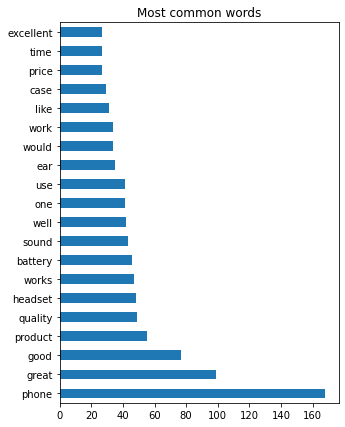

In [14]:
filtered_sentence = [word for word in token_list if word not in stop_words]
most_common = FreqDist(word for word in filtered_sentence)
pd.Series(dict(most_common)).sort_values(ascending=False)[:20].\
                                             plot(kind='barh', figsize=(5, 7), title='Most common words')

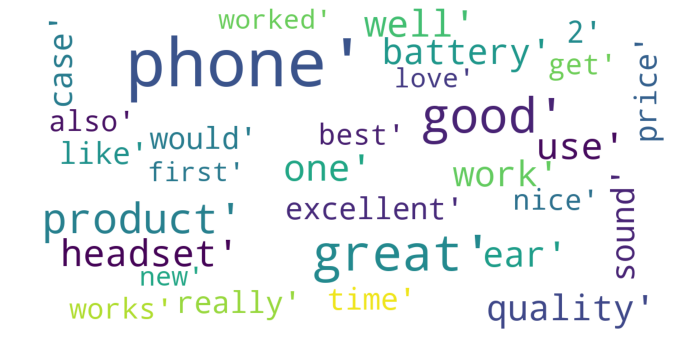

In [15]:
# plot a wordcloud
import word_cloud as wc # custom function...
wc.show_wordcloud(filtered_sentence, max_word=30)

In [16]:
' ,'.join(filtered_sentence)

'way ,plug ,us ,unless ,go ,converter ,good ,case ,excellent ,value ,great ,jawbone ,tied ,charger ,conversations ,lasting ,45 ,minutes ,major ,problems ,mic ,great ,jiggle ,plug ,get ,line ,right ,get ,decent ,volume ,several ,dozen ,several ,hundred ,contacts ,imagine ,fun ,sending ,one ,one ,razr ,owner ,must ,needless ,say ,wasted ,money ,waste ,money ,time ,sound ,quality ,great ,impressed ,going ,original ,battery ,extended ,battery ,two ,seperated ,mere ,5 ,ft ,started ,notice ,excessive ,static ,garbled ,sound ,headset ,good ,quality ,though ,design ,odd ,ear ,clip ,comfortable ,highly ,recommend ,one ,blue ,tooth ,phone ,advise ,everyone ,fooled ,far ,good ,works ,great ,clicks ,place ,way ,makes ,wonder ,long ,mechanism ,would ,last ,went ,motorola ,website ,followed ,directions ,could ,get ,pair ,bought ,use ,kindle ,fire ,absolutely ,loved ,commercials ,misleading ,yet ,run ,new ,battery ,two ,bars ,three ,days ,without ,charging ,bought ,mother ,problem ,battery ,great ,po

In [17]:
# search for collocation
bgm    = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(filtered_sentence)
scored = finder.score_ngrams( bgm.likelihood_ratio  )
print(scored[:10])

[(('customer', 'service'), 101.91871835602993), (('battery', 'life'), 96.03683963359741), (('waste', 'money'), 88.19070083532627), (('sound', 'quality'), 81.54111201805722), (('highly', 'recommend'), 81.47983744359006), (('works', 'great'), 77.65136945284632), (('would', 'recommend'), 60.02945829450444), (('bluetooth', 'headset'), 52.016661311557286), (('piece', 'junk'), 51.70908598816242), (('works', 'fine'), 49.32415258032411)]


In [18]:
collocations = pd.DataFrame(scored)
collocations.columns = ['collocation', 'score']
collocations.set_index('collocation', inplace=True)

In [19]:
collocations.head(20)

,score
collocation,
"(customer, service)",101.918718
"(battery, life)",96.036840
"(waste, money)",88.190701
"(sound, quality)",81.541112
"(highly, recommend)",81.479837
"(works, great)",77.651369
"(would, recommend)",60.029458
"(bluetooth, headset)",52.016661
"(piece, junk)",51.709086


<AxesSubplot:title={'center':'top 20 collocated words'}, ylabel='collocation'>

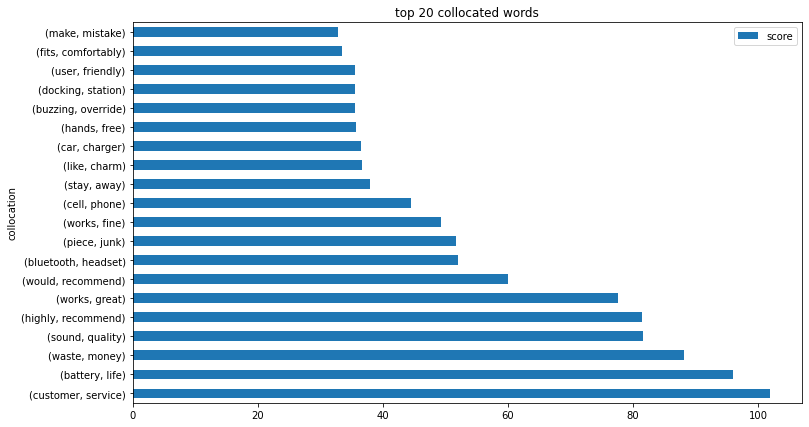

In [20]:
collocations.head(20).plot(kind='barh', title= 'top 20 collocated words', figsize=(12, 7))

In [21]:
# search for named entity

sp = spacy.load('en_core_web_sm')
comb = ' '.join(filtered_sentence)
comb = sp(comb)

In [22]:
NE = [(word.text, word.ent_type_) for word in comb]

In [23]:
displacy.render(comb, style='ent', jupyter=True)

# Perform feature engineering and fit the model

In [24]:
# split the data into training and testing set

X, y = amazon_cells['Review'], amazon_cells['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=.3)

In [25]:
# normalize the train and test reviews

X_train_norm = tn.normalize_corpus(corpus=X_train, 
                    accented_char_removal=True, 
                    html_stripping= False,
                    contraction_expansion=False, 
                    stopword_removal=True,
                    text_lower_case=True,
                    remove_digits=False,
                   )

X_test_norm = tn.normalize_corpus(corpus=X_test, 
                    accented_char_removal=True, 
                    html_stripping= False,
                    contraction_expansion=False, 
                    stopword_removal=True,
                    text_lower_case=True,
                    remove_digits=False,
                   )

NameError: name 'tn' is not defined

In [ ]:
# fitting the model using TFIDF for feature engineering..

count_vect = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1, 2))
tfidf = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1, 2))

In [ ]:
cv_train_features =count_vect.fit_transform(X_train_norm)
cv_test_features= count_vect.transform(X_test_norm)

tv_train_features=tfidf.fit_transform(X_train_norm)
tv_test_features= tfidf.transform(X_test_norm)

In [ ]:
# bag of words
print('train features: ', cv_train_features.shape)
print('test features: ', cv_test_features.shape)

In [ ]:
# tfidf 
print('train features: ', tv_train_features.shape)
print('test features: ', tv_test_features.shape)

In [ ]:
clf_list = [gnb, lr, svc, dt, rf]
clf_names = ['Gaussian NB', 'Logistic Regression', 'SVC', 'Decision tree', 'Random forest']
model_list= []
scores_list = []
for clf in clf_list:
    model = clf.fit(tv_train_features.toarray(), y_train)
    scores = clf.score(tv_test_features.toarray(), y_test) 
    model_list.append(model)
    scores_list.append(scores)

In [ ]:
pd.Series(scores_list, index=clf_names)

In [ ]:
new_review = pd.Series(['my mobile phone just got robbed, cause is so appealing to have.'])
new_review_transformed = tfidf.transform(new_review)

In [ ]:
model_list[0].score(tv_test_features.toarray(), y_test)

In [ ]:
# make a prediction..

model_list[1].predict(new_review_transformed.toarray())

# Perform model evaluation

In [ ]:
# model evaluation

from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
# cross validation scores
k = KFold(n_splits=20)

cv_scores=[]
for model in model_list:
    cv_ = cross_val_score(model, tv_train_features.toarray(), y_train, cv=k)
    cv_scores.append(cv_)

In [ ]:
pd.DataFrame(cv_scores, index= clf_names).T.boxplot()

In [ ]:

# classification reports
predictions = []
for name, model in zip(clf_names, model_list):
    pred = model.predict(tv_test_features.toarray())
    predictions.append(pred)
    print(name+ '-classification report\n')
    print(classification_report(y_test, pred, target_names=['negative', 'positive']))
    print('==========================================================================')

In [ ]:
# confusion matrix 
for name, pred in zip(clf_names, predictions):
    print(name+' confusion matrix')
    print(pd.DataFrame(confusion_matrix(y_test, pred), 
                       index= ['positve', 'negative'], 
                       columns=['positive', 'negative']), '\n')   
    print('+-------------------------------------------+')

In [ ]:
# learning curvs
train_size, train_score, test_score = learning_curve(model_list[0], 
                             tv_train_features.toarray(),  y_train,
                             train_sizes= np.linspace(.1, 1., 10), cv=10)

train_mean =np.mean(train_score, axis=1)
test_mean= np.mean(test_score, axis=1)

train_std=np.std(train_score, axis=1)
test_std= np.std(test_score, axis=1)
plt.title(clf_list[0])
plt.plot(train_size, train_mean, color='blue', label='training')
plt.plot(train_size, test_mean, color='red', label='validation')

In [ ]:
train_size, train_score, test_score = learning_curve(model_list[1], 
                             tv_train_features.toarray(),  y_train,
                             train_sizes= np.linspace(.1, 1., 10), cv=10)

train_mean =np.mean(train_score, axis=1)
test_mean= np.mean(test_score, axis=1)

train_std=np.std(train_score, axis=1)
test_std= np.std(test_score, axis=1)
plt.title(clf_list[1])
plt.plot(train_size, train_mean, color='blue', label='training')
plt.plot(train_size, test_mean, color='red', label='validation')

In [ ]:
train_size, train_score, test_score = learning_curve(model_list[2], 
                             tv_train_features.toarray(),  y_train,
                             train_sizes= np.linspace(.1, 1., 10), cv=10)

train_mean =np.mean(train_score, axis=1)
test_mean= np.mean(test_score, axis=1)

train_std=np.std(train_score, axis=1)
test_std= np.std(test_score, axis=1)
plt.title(clf_list[2])
plt.plot(train_size, train_mean, color='blue', label='training')
plt.plot(train_size, test_mean, color='red', label='validation')

In [ ]:
train_size, train_score, test_score = learning_curve(model_list[3], 
                             tv_train_features.toarray(),  y_train,
                             train_sizes= np.linspace(.1, 1., 10), cv=10)

train_mean =np.mean(train_score, axis=1)
test_mean= np.mean(test_score, axis=1)

train_std=np.std(train_score, axis=1)
test_std= np.std(test_score, axis=1)
plt.title(clf_list[3])
plt.plot(train_size, train_mean, color='blue', label='training')
plt.plot(train_size, test_mean, color='red', label='validation')

In [ ]:
train_size, train_score, test_score = learning_curve(model_list[4], 
                             tv_train_features.toarray(),  y_train,
                             train_sizes= np.linspace(.1, 1., 10), cv=10)

train_mean =np.mean(train_score, axis=1)
test_mean= np.mean(test_score, axis=1)

train_std=np.std(train_score, axis=1)
test_std= np.std(test_score, axis=1)
plt.title(clf_list[4])
plt.plot(train_size, train_mean, color='blue', label='training')
plt.plot(train_size, test_mean, color='red', label='validation')

In [ ]:
from joblib import dump

In [ ]:
dump(model_list[1], 'output/model.pkl')

# Tuning and saving the best model.

In [ ]:
# tuning the logstic regression model

In [ ]:
from sklearn.pipeline import Pipeline
from joblib import dump

pipe= Pipeline([('vectorizer', tfidf), ('clf', LogisticRegression())])
pipe.fit(X_train_norm, y_train)
pipe.score(X_test_norm, y_test)
dump(pipe,'output/pipe_model.pkl')

In [ ]:
pipe.predict(['samsung is really doing bad'])[0]

In [ ]:
from sklearn.model_selection import GridSearchCV

paramters = {'clf__C': [1, 10, 100, 1000, 10000],
            'clf__tol':[0.1, 0.01, 0.001, 0.0001],
            'clf__max_iter':[10,100, 1000, 10000],
            'clf__penalty': ['l1', 'l2', 'elasticnet'],
             'clf__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
            }
modelGCV = GridSearchCV(pipe, paramters, n_jobs=-1)

In [ ]:
modelGCV.fit(X_train_norm, y_train)

In [ ]:
modelGCV.best_estimator_

In [ ]:
print("model performance after tuning: ",np.round(modelGCV.score(X_test_norm, y_test)*100, 2), "%")

In [ ]:
dump(modelGCV, 'output/model_tuned.pkl')

In [ ]:
from joblib import load

model_ = load('output/model_tuned.pkl')

### Evaluation report for the best model.

In [ ]:
# classification report
pred_0 = model_.predict(X_test_norm)
print(classification_report(y_test, pred_0, target_names= ['negative', 'positive']) ,)

In [ ]:
# confusion matrix of the final model
pd.DataFrame(confusion_matrix(y_test, pred_0), columns=['pos', 'neg'], index=['pos', 'neg'])

In [ ]:
# save the outputs..

In [ ]:
pred_prob_test = np.round(model_.predict_proba(X_test_norm), 2)

In [ ]:
model_.predict(X_test_norm)

At this stage, I saved the predictions made by my model into a **.csv** file plus its predict probabilities and compound (normalized score)

In [ ]:
# prediction probabilities
pred_prob_testdf= pd.DataFrame(pred_prob_test, columns = ['negative-score', 'positive-score'])
pred_prob_testdf.head(7)

In [ ]:
X_test_norm_df = pd.DataFrame(X_test_norm, columns= ['review'])

In [ ]:
X_test_norm_df.shape

In [ ]:
pred_prob_testdf.shape

In [ ]:
scores_ = pd.concat([X_test_norm_df, pred_prob_testdf], axis=1)
scores_.to_csv('output/scores.csv')

In [ ]:
def compound(x, alpha=15):
    
    score= x/np.sqrt(x**2+alpha)
    return score

In [ ]:
1-(compound(0.565)+compound(0.435)+compound(0))

In [ ]:
pred_prob_testdf['compound-pos'] = compound(pred_prob_testdf['positive-score'])
pred_prob_testdf['compound-neg'] = compound(pred_prob_testdf['negative-score'])

In [ ]:
# from the compound score we see that there is equal distribution of positive and negative 
# sentiment..

In [ ]:
pred_prob_testdf['compound-neg'].sum()/300

In [ ]:
pred_prob_testdf['compound-pos'].sum()/300

In [ ]:
# looking at the **compound** metric we see clearly that there is an equal distribution of postive and negative sentiments 
# since both compounds are around 0.12

In [ ]:
pred_prob_testdf.to_csv('output/scores1.csv')

In [ ]:
scores2 = pd.concat([X_test_norm_df, pred_prob_testdf], axis=1)
scores2.to_csv('output/scores2.csv')

## Conclusion:
This ends the project on sentiment analysis using supervised machine learning approach.
Although there are many pre-trained models such as **Vader** which performs way better than this model.
But I only did project for learning purposes.